In [ ]:
import numpy as np
import pandas as pd
import re

# Regression Model

In [ ]:
# predict probabilities with a multinomial logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

normalized_df=(feature_df-feature_df.mean())/feature_df.std()
X = normalized_df
y = inp_df.grade_level

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [ ]:
scores = evaluate_model(model, X_test, y_test)
np.mean(scores)

0.8165024630541874

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average=None)

(array([0.88095238, 0.68627451, 0.89795918]),
 array([0.86046512, 0.60344828, 0.93617021]),
 array([0.87058824, 0.64220183, 0.91666667]),
 array([ 43,  58, 188]))

In [ ]:
final_feature_df['regression_pred'] = model.predict(X)
final_feature_df.to_csv('grade_prediction_regression.csv')

In [ ]:
final_feature_df

,span,elaboration,background,contrast,attribution,satellite_count,nuclei_count,tree_depth,average_edu_length,std_deviation_of_length,...,same-unit,summary,cause,textualorganization,temporal,comparison,grade_level,flesch_reading_score,flesch_grade,regression_pred
0,28,23,1.0,1.0,3.0,28,28,8,5.655172,2.453370,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,96.59,1.9,1
1,21,19,0.0,0.0,2.0,21,21,8,6.136364,2.159450,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,73.03,4.8,1
2,23,20,0.0,0.0,3.0,23,23,5,6.666667,2.939199,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,82.00,3.4,1
3,16,14,0.0,0.0,2.0,16,16,6,5.588235,3.049760,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,82.10,3.3,1
4,25,25,0.0,0.0,0.0,25,25,8,5.807692,2.094301,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,90.26,2.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,17,14,0.0,0.0,0.0,15,17,7,7.000000,4.537426,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,77.64,5.1,1
1437,23,18,1.0,0.0,4.0,23,33,5,7.068966,3.814049,...,4.0,0.0,0.0,0.0,0.0,0.0,3.0,78.14,4.9,3
1438,73,58,0.0,1.0,10.0,73,85,26,8.687500,5.622708,...,6.0,1.0,0.0,0.0,0.0,0.0,3.0,75.50,5.9,3
1439,27,22,0.0,0.0,4.0,27,29,8,9.068966,4.274471,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,76.52,5.5,3


Feature: 0 : span:, Score: -0.12830
Feature: 1 : elaboration:, Score: -0.08967
Feature: 2 : background:, Score: 0.14020
Feature: 3 : contrast:, Score: 0.05166
Feature: 4 : attribution:, Score: -0.84861
Feature: 5 : satellite_count:, Score: -0.18251
Feature: 6 : nuclei_count:, Score: -0.11014
Feature: 7 : tree_depth:, Score: 0.15433
Feature: 8 : average_edu_length:, Score: 0.37842
Feature: 9 : std_deviation_of_length:, Score: -0.21196
Feature: 10 : normalized_satellite_count:, Score: 0.90237
Feature: 11 : normalized_nuclei_count:, Score: 0.34433
Feature: 12 : elaboration_proportion:, Score: 0.13709
Feature: 13 : total_sentence_length:, Score: -0.50553
Feature: 14 : average_words_per_sentence:, Score: -2.53916
Feature: 15 : number_of_unique_satellite_types:, Score: -0.34169
Feature: 16 : enablement:, Score: -0.04953
Feature: 17 : joint:, Score: 0.09620
Feature: 18 : condition:, Score: -0.04140
Feature: 19 : explanation:, Score: -0.35816
Feature: 20 : mannermeans:, Score: -0.00372
Feature

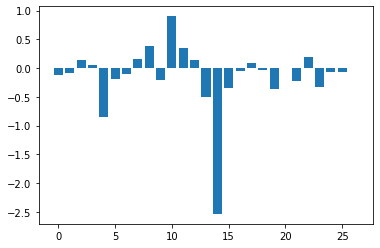

In [ ]:
import matplotlib.pyplot as plt

importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d : %s:, Score: %.5f' % (i,feature_df.columns[i], v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)


In [ ]:
comp_df = pd.DataFrame()
comp_df['cluster_lables'] = kmeans.labels_
comp_df['grade_levels'] = inp_df.grade_level
comp_df

,cluster_lables,grade_levels
0,2,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
...,...,...
588,0,3.0
589,0,3.0
590,0,3.0
591,0,3.0


In [ ]:
check_acc = final_feature_df
c = 0
for i, row in check_acc.iterrows():
  if row.regression_pred == row['BERT Prediction']:
    c += 1

print(c/len(check_acc))

0.7057598889659958


In [ ]:
req_df = pd.read_csv('grade_prediction_regression_DOGO.csv')
req_df = req_df.dropna()

In [ ]:
regression_validity = []
bert_validity = []
for i, row in req_df.iterrows():
  if row['regression_pred'] == int(row['grade_level']):
    regression_validity.append('Correct')
  else:
    regression_validity.append('Incorrect')

  if row['BERT Prediction'] == int(row['grade_level']):
    bert_validity.append('Correct')
  
  else:
    bert_validity.append('Incorrect')

req_df['Regression Validity'] = regression_validity
req_df['BERT Validity'] = bert_validity

req_df.to_csv('DOGO_final.csv')


In [ ]:
req_df

,Unnamed: 0,span,same-unit,elaboration,joint,satellite_count,nuclei_count,tree_depth,average_edu_length,std_deviation_of_length,...,cause,temporal,summary,grade_level,flesch_reading_score,flesch_grade,regression_pred,BERT Prediction,Regression Validity,BERT Validity
0,0,15,6,15,2,15,23,5,9.100000,4.877499,...,0,0,0,1.0,45.96,11.0,1,1,Correct,Correct
1,1,23,6,19,2,23,31,4,7.857143,3.710163,...,0,0,0,1.0,70.53,7.8,1,1,Correct,Correct
2,2,19,4,16,6,19,29,4,8.880000,4.760840,...,0,0,0,1.0,57.91,10.6,1,1,Correct,Correct
3,3,16,8,12,2,14,26,6,9.857143,4.528068,...,0,0,0,1.0,58.62,10.3,1,1,Correct,Correct
4,4,22,6,19,0,22,28,6,8.538462,6.452374,...,0,0,0,1.0,54.97,11.7,1,1,Correct,Correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,588,37,6,34,2,37,45,6,11.833333,8.524242,...,0,0,0,3.0,46.40,12.9,3,2,Correct,Incorrect
589,589,56,8,39,2,56,66,6,8.435484,5.884975,...,0,0,0,3.0,65.56,9.7,3,3,Correct,Correct
590,590,43,8,38,4,43,55,8,11.080000,7.883755,...,0,0,0,3.0,49.65,11.7,3,3,Correct,Correct
591,591,49,6,42,4,49,59,6,9.581818,5.249038,...,0,0,0,3.0,54.05,12.1,3,3,Correct,Correct
